# Traitement des données textuelles

Souvent plusieurs étapes, notamment la récupération et la mise en  forme

## Moment 1 - Récupérer le corpus

Présence du terme "science ouverte" dans les articles de presse

Moment "man in the loop" avec une interface comme Europresse

## Moment 2 - Traiter les données

In [2]:
import bs4 # Bibliothèque données html
import pandas as pd # Bibliothèque tableaux
import matplotlib.pyplot as plt # Bibliothèque visualisations

#Script fait à part de nettoyage
import europresse

Détailler un peu le module qui mobilise BeautifulSoup

- manipuler des formats HTML
- recherche des balises, des arborescences...
- facilite le parsing
- d'autres stratégies, avec par exemple les expressions régulières

In [6]:
!cat europresse.py

import pandas as pd
import bs4 as bs
import regex as re
import datetime
import os
import matplotlib.pyplot as plt

__version__ = "0.1.0"

def extract(file): 
    """
    Extraction de données d'une page Europesse (nombre limités de champs)
    """
    corpus_html = bs.BeautifulSoup(open(file, encoding="utf8"),"lxml")    
    corpus = [] #tableau que l'on va remplir avec les données
    for i in corpus_html.find_all("article"):
        
        #on regarde s'il y a un titre dans l'article
        try:
            titre = i.find("div",{"class":"titreArticle"}).text 
        except:
            titre = None #sinon on renvoie rien
            
        #Pareil pour la date/header
        try:
            header = i.find("span",{"class":"DocHeader"}).text
        except:
            header = None
        
        #Le nom de la publicatoin
        try:
            publication = i.find("span",{"class":"DocPublicationName"}).text
        except:
            publication = None
         
        

Chargement des données et création d'un CSV

In [4]:
# Extraire les données de la page
corpus = europresse.extract("../data/europresse_science_ouverte_presse_nationale.html")

# Passage dans un tableau
corpus = pd.DataFrame(corpus)

# Mise en forme
corpus.columns = ["Date","Titre","Journal","Contenu","Auteur"]
corpus["Date_reco"] = corpus["Date"].apply(europresse.reco_date)
corpus["Date_reco"] = pd.to_datetime(corpus["Date_reco"])
corpus = corpus.set_index("Date_reco")
corpus.to_csv("../data/europresse.csv")
corpus

,Date,Titre,Journal,Contenu,Auteur
Date_reco,,,,,
2021-07-15,"Science & Médecine, jeudi 15 juillet 2021 72...",Des résultats scientifiques plus accessibles ...,Le Monde,Les budgets qui augmentent dans le monde de ...,David Larousserie
2021-12-11,"Régions, samedi 11 décembre 2021 597 mots","In&Sight, la plateforme bordelaise résolue à ...","La Tribune (France), no. 7287",LA TRIBUNE - Vous avez co-fondé In&Sight (1)...,Propos recueillis par Anne Farthouat
2020-06-16,"mardi 16 juin 2020 1026 mots, p. 8,9",Coronavirus : les grandes revues scientifique...,Libération,"Al'image du Lancet, les revues scientifiques...",Olivier Monod
2020-01-10,"Horizons, vendredi 10 janvier 2020 1873 mots...","Paul Allen, bienfaiteur de Seattle La philant...",Le Monde,Seattle (États-Unis) envoyé spécial - Le cél...,Arnaud Leparmentier
2017-09-20,"Science & Médecine, mercredi 20 septembre 20...",La recherche académique a tout à gagner à se ...,Le Monde,"Progressivement, le concept d'Open Science t...",None
...,...,...,...,...,...
2019-07-08,"Idées & Débats, lundi 8 juillet 2019 212 mot...",L'imagerie cérébrale au service des grottes p...,"Les Echos, no. 22984",Les peintures ornant la grotte de Lascaux da...,YANN VERDO
2019-09-12,"Débats&Controverses, jeudi 12 septembre 2019...",Les usages du numérique Nos données personnel...,l'Humanité,rappel des faits Face à la marche imposée pa...,None
2017-07-08,"Territoires, samedi 8 juillet 2017 944 mots,...","Sécurité, économie et écologie : les atouts d...","La Tribune (France), no. 6251",Acteurs de l'économie - La Tribune. Qu'est-c...,Elsa Ferreira


## Moment 3 - Produire une information

Text(0, 0.5, "Nombre d'articles")

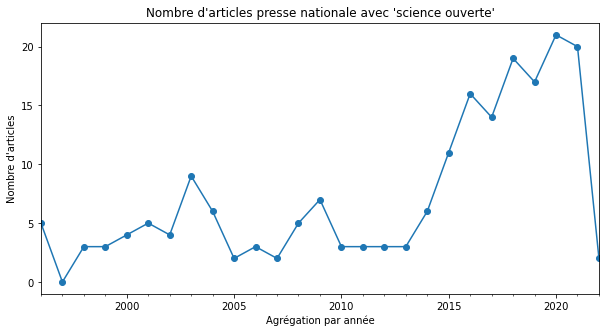

In [5]:
ax = corpus["Titre"].resample("y").count().plot(figsize=(10,5),style="o-")
ax.set_title("Nombre d'articles presse nationale avec 'science ouverte'")
ax.set_xlabel("Agrégation par année")
ax.set_ylabel("Nombre d'articles")

## Moment ... sky is the limit

- Recoder les journaux
- Nombre d'occurence du terme
- Analyse thématique ?